# Maximum probability of loss

We are investing in two assets. Let $R_1$ and $R_2$ be the random variables corresponding to the returns. Both $R_1$ and $R_2$ have Gaussian marginal distributions, with known means $\mu_1=5$ and $\mu_2=15$ and known standard deviations $\sigma_1=3$ and $\sigma_2=10$. Moreover, we are given the correlation coefficient $\rho=-0.3$, i.e.,$$\mathbf{E} (R_1-\mu_1) (R_2-\mu_2)  = \rho \sigma_1 \sigma_2.$$

Use a linear programming solver to find the worst-case (maximum) probability of a loss, i.e, $p^\mathrm{loss} = \mathbf{Pr} (R_1+R_2 \leq 0)$. Compare the results to the case when $R_1$ and $R_2$ are jointly Gaussian.  Then,
  
  $$R_1+R_2 \sim \mathcal N(\mu_1+\mu_2,\sigma_1^2+\sigma_2^2+2 \rho \sigma_1\sigma_2),$$
  
  which for our parameters gives $p^\mathrm{loss} \approx 0.018$. 
  
This is an infinite-dimensional optimization problem, since you must maximize $p^\mathrm{loss}$ over an infinite-dimensional set of joint distributions. To (approximately) solve it, we discretize the values that $R_1$ and $R_2$ can take on, to $n=100$ values $r_1,\ldots, r_n$, uniformly spaced from $r_1=-20$ to $r_n=+50$. 
We use the discretized marginals $p^{(1)}$ and $p^{(2)}$ for $R_1$ and $R_2$, given by$$p^{(k)}_i =\mathbf{Pr}(R_k = r_i) =\frac{ \exp \left(-(r_i-\mu_k)^2/(2 \sigma_k^2) \right)}{\sum_{j=1}^n  \exp \left( -(r_j-\mu_k)^2/(2 \sigma_k^2) \right)},$$
  for $k=1,2$, $i=1, \ldots, n$.
  
  Plot the joint distribution that yields the maximum value of $p^\mathrm{loss}$ using e.g. ``matplotlib``'s ``contour`` (see the code below for two jointly Gaussian variables). Interpret what you see. 
  
  ---- 
*This exercise originates from "Additional Exercises" collection for Convex Optimization textbook of S. Boyd and L. Vandenberghe. Used under permission*

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
mu = (5, 15)
sigma = (3, 10)
rho = -0.3
n = 100
r=np.linspace(-20,50,n)
print(r)
# find the first index that is greater than 0
i = next(x[0] for x in enumerate(r) if x[1] > 0)
print(i)

[-20.         -19.29292929 -18.58585859 -17.87878788 -17.17171717
 -16.46464646 -15.75757576 -15.05050505 -14.34343434 -13.63636364
 -12.92929293 -12.22222222 -11.51515152 -10.80808081 -10.1010101
  -9.39393939  -8.68686869  -7.97979798  -7.27272727  -6.56565657
  -5.85858586  -5.15151515  -4.44444444  -3.73737374  -3.03030303
  -2.32323232  -1.61616162  -0.90909091  -0.2020202    0.50505051
   1.21212121   1.91919192   2.62626263   3.33333333   4.04040404
   4.74747475   5.45454545   6.16161616   6.86868687   7.57575758
   8.28282828   8.98989899   9.6969697   10.4040404   11.11111111
  11.81818182  12.52525253  13.23232323  13.93939394  14.64646465
  15.35353535  16.06060606  16.76767677  17.47474747  18.18181818
  18.88888889  19.5959596   20.3030303   21.01010101  21.71717172
  22.42424242  23.13131313  23.83838384  24.54545455  25.25252525
  25.95959596  26.66666667  27.37373737  28.08080808  28.78787879
  29.49494949  30.2020202   30.90909091  31.61616162  32.32323232
  33.030303

Below we create the marginals of the discrete distrubution

[[7.82676233e-17 5.42639055e-16 3.55889308e-15 ... 1.37290816e-47
  4.34955142e-49 1.30353424e-50]
 [6.17299053e-05 7.88654712e-05 1.00255208e-04 ... 1.00255208e-04
  7.88654712e-05 6.17299053e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


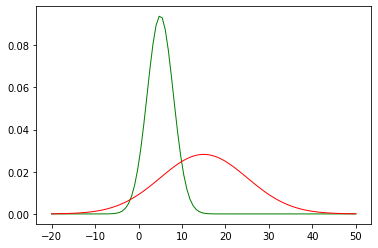

In [3]:
e = lambda k, i : math.exp(-(r[i]-mu[k])**2 / (2*sigma[k]**2))
p_mar = np.zeros((n,n))
for k in [0,1]:
    sum_exp = sum(e(k,i) for i in range(100))
    for i in range(n):
        p_mar[k][i] = e(k,i)/sum_exp
print(p_mar)
plt.rcParams['figure.figsize'] = [6, 3]
fig = plt.figure()
plt.plot(r,p_mar[0], 'g', linewidth=1)
plt.plot(r,p_mar[1], 'r', linewidth=1)

Let's also draw the joint Gaussian distribution, just for fun.

In [4]:
#calculate probability of loss
from scipy.stats import norm
norm.cdf(0, sum(mu), math.sqrt(sigma[0]**2 + sigma[1]**2 + 2*rho*sigma[0]*sigma[1]))

0.018015843109116775

[[-20.         -19.29292929 -18.58585859 ...  48.58585859  49.29292929
   50.        ]
 [-20.         -19.29292929 -18.58585859 ...  48.58585859  49.29292929
   50.        ]
 [-20.         -19.29292929 -18.58585859 ...  48.58585859  49.29292929
   50.        ]
 ...
 [-20.         -19.29292929 -18.58585859 ...  48.58585859  49.29292929
   50.        ]
 [-20.         -19.29292929 -18.58585859 ...  48.58585859  49.29292929
   50.        ]
 [-20.         -19.29292929 -18.58585859 ...  48.58585859  49.29292929
   50.        ]]
[[-20.         -20.         -20.         ... -20.         -20.
  -20.        ]
 [-19.29292929 -19.29292929 -19.29292929 ... -19.29292929 -19.29292929
  -19.29292929]
 [-18.58585859 -18.58585859 -18.58585859 ... -18.58585859 -18.58585859
  -18.58585859]
 ...
 [ 48.58585859  48.58585859  48.58585859 ...  48.58585859  48.58585859
   48.58585859]
 [ 49.29292929  49.29292929  49.29292929 ...  49.29292929  49.29292929
   49.29292929]
 [ 50.          50.          50.        

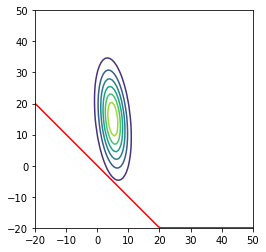

In [5]:
from scipy.stats import multivariate_normal

# Initializing the covariance matrix
cov = np.array([[sigma[0]**2, rho*sigma[0]*sigma[1]], [rho*sigma[0]*sigma[1], sigma[1]**2]])

# Generating a Gaussian bivariate distribution
# with given mean and covariance matrix
distr = multivariate_normal(cov = cov, mean = mu)
print(distr)

# Generating a meshgrid complacent with
# the 3-sigma boundary
X, Y = np.meshgrid(r,r)
print(X)
print(Y)

# Generating the density function
# for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        print([X[i,j], Y[i,j]])
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])

plt.axes().set_aspect('equal')
plt.contour(X, Y, pdf)
plt.plot(r,list(map(lambda x: max(x,-20), -r)),color="r") #R1+R2==0 red line


Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-22
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Linux Mint 20.2")

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10202 rows, 10000 columns and 50000 nonzeros
Model fingerprint: 0x1cb31dfa
Coefficient statistics:
  Matrix range     [9e-02, 2e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-50, 9e+00]
Presolve removed 10048 rows and 4600 columns
Presolve time: 0.02s
Presolved: 154 rows, 5400 columns, 16146 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.499e+03
 Factor NZ  : 9.191e+03 (roughly 2 MB of memory)
 Factor Ops : 6.757e+05 (less than 1 second per iteration)
 Threads    : 1

               

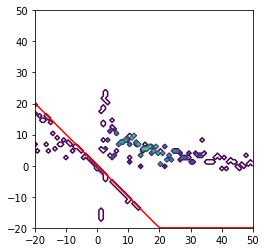

In [6]:
import gurobipy as gp

negmat = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        negmat[i][j] = 1 if r[i]+r[j] <= 0 else 0

# Create a new model
model = gp.Model("portfolio")

p = {}

for i in range(n):
    for j in range(n):
        p[i,j] = model.addVar(name="p[%d,%d]".format(i, j))

# Set objective to maximize p[i, j] * negmat[i, j]
model.setObjective(gp.quicksum(p[i,j] * negmat[i,j] for i in range(n) for j in range(n)), gp.GRB.MAXIMIZE)

# constraint to ensure r0 have a gaussian marginal distribution
for i in range(n):
    model.addConstr(gp.quicksum(p[i,j] for j in range(n)) == p_mar[0][i])

# constraint to ensure r1 have a gaussian marginal distribution
for j in range(n):
    model.addConstr(gp.quicksum(p[i,j] for i in range(n)) == p_mar[1][j])


# constraints to ensure cov == sigma[0]*sigma[1]*rho
model.addConstr(gp.quicksum(p[i,j] * (r[i] - mu[0]) * (r[j] - mu[1]) for i in range(n) for j in range(n)) == sigma[0]*sigma[1]*rho)
# constraints to ensure sum(p[i,j]) == 1
model.addConstr(gp.quicksum(p[i,j] for i in range(n) for j in range(n)) == 1)

# Add constraints to ensure p[i,j] >= 0
for i in range(n):
    for j in range(n):
        model.addConstr(p[i,j] >= 0)

model.update()

# optimize the model
model.optimize()

for i in range(n):
    for j in range(n):
        print(p[i,j].x)

X, Y = np.meshgrid(r, r)
pdf  = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = p[i,j].x

plt.axes().set_aspect('equal')
plt.contour(X, Y, pdf)
plt.plot(r, list(map(lambda x: max(x,-20), -r)), color="r")

# print the objective value
print(model.objVal)

In [ ]:
'''
Interpretation:
The linear programming approach yields a probability distribution with a much higher probability of loss (0.0966) compared to the multivariate normal distribution (0.0180).
This is because the linear programming approach is more flexible and can adapt to the given marginal distributions and correlation coefficient in ways that maximize the probability of loss.
This phenomenon is evident in the contour plot of the joint distribution that yields the highest probability of loss, where a significant amount of the probability mass is concentrated
just below the red line—representing the point where the sum of the two random variables equals zero—and in regions where the returns on investments are high.
This leads to a higher probability of loss while maintaining a positive mean, as well as the specified standard deviations and correlation coefficient.
'''

Above one can see that the two variables are indeed negatively correlated. 
The region below the red line is the loss event (we see that it is indeed unlikely)